In [1]:
# imports iniciais
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# constantes globais
global h,e,me,alfa,beta
h = 6.626*1e-34 #Js
e = 1.602*1e-19 #C
me = 9.109*1e-31 #kg
eps0 = 8.854*1e-12 #A.s/V
sig_i = 0.01

# Átomo de Bohr

Nosso objetivo é descobrir a constante de rede $d$ da rede de reflexão utilizada. O valor de referência é $d \approx 600$ linhas/mm.

Para isso, vamos utilizar a relação $$d(\sin(\theta_i) - \sin(\theta_r)) = m \lambda$$

Nesse caso m = 1

## Importando e Exibindo os dados

### Lâmpada de Mercúrio

In [3]:
df_hg = pd.read_csv('https://raw.githubusercontent.com/binha0/Lab1/main/Fisica%205%20analise%20de%20dados%20-%20csv%20hg%20(1).csv')
df_hg

,cores,lambda,theta i,theta0,m,inc theta,lampada,angulo reflexao,angulos r,sen(r)
0,Branco,0.000,56,91,0,0.008333,Hg,159.00,56.00,-
1,Roxo,404.656,56,91,1,0.008333,Hg,179.00,36.00,0.5877852523
2,Azul,435.833,56,91,1,0.008333,Hg,180.80,34.20,0.5620833779
3,Verde,546.960,56,91,1,0.008333,Hg,185.00,30.00,0.5
4,Amarelo 1,576.970,56,91,1,0.008333,Hg,186.05,28.95,0.4840461861
5,Amarelo 2,579.066,56,91,1,0.008333,Hg,186.17,28.83,0.4822124411


In [4]:
lambda_hg = np.array(df_hg['lambda'][1:],dtype=float)
sen_r_hg = np.array(df_hg['sen(r)'][1:],dtype=float)

### Lâmpada de Hidrogênio

In [5]:
df_h2 = pd.read_csv('https://raw.githubusercontent.com/binha0/Lab1/main/Fisica%205%20analise%20de%20dados%20-%20csv%20h2%20(1).csv')
df_h2

,cores,lambda,theta i,theta0,m,inc theta,lampada,angulo reflexao,angulos r,sen(r)
0,Branco,0,56,90.4,0,0.008333,H2,-,-,-
1,Roxo,410.17,56,90.4,1,0.008333,H3,157.8,56.6,0.8348478633
2,Azul,434.05,56,90.4,1,0.008333,H4,158,56.4,0.8329212407
3,Ciano,486.13,56,90.4,1,0.008333,H5,159,55.4,0.8231363685
4,Laranja,-,56,90.4,1,0.008333,H6,163.5,50.9,0.7760464071
5,Vermelho,656.28,56,90.4,1,0.008333,H7,166.5,47.9,0.741975841


In [6]:
lambda_h2 = np.array([float(df_h2['lambda'][1]),float(df_h2['lambda'][2]),float(df_h2['lambda'][3]),float(df_h2['lambda'][5])])
sen_r_h2 = np.array([float(df_h2['sen(r)'][1]),float(df_h2['sen(r)'][2]),float(df_h2['sen(r)'][3]),float(df_h2['sen(r)'][5])])

theta_i = np.array(df_h2['theta i '][1],dtype=float) # os dados são repetidos, pode pegar qualquer um do array
sen_th_i = np.sin(theta_i*np.pi /180) # passando pra radiano

In [8]:
th_r_h2 = np.array([float(df_h2['angulos r'][1]),float(df_h2['angulos r'][2]),float(df_h2['angulos r'][3]),float(df_h2['angulos r'][5])]) # já passando pra radianos
th_r_hg = np.array(df_hg['angulos r'][1:],dtype=float)
#th_r_h2 = th_r_h2[1:]
#th_r_hg = th_r_hg[1:]

sig_th_h2, sig_th_hg = df_h2['inc theta '][1], df_hg['inc theta '][1]

sig_sen_r_h2 = np.cos(th_r_h2*np.pi/180)*sig_th_h2
sig_sen_r_hg = np.cos(th_r_hg*np.pi/180)*sig_th_hg

### incertezas

In [10]:
inc_th = float(df_hg['inc theta '][1])

inc_sen_hg = np.cos(th_r_hg*np.pi/180)*inc_th
inc_sen_h2 = np.cos(th_r_h2*np.pi/180)*inc_th

In [26]:
print('Incertezar para seno de theta r para o mercúrio:', inc_sen_hg)
print('Incertezar para seno de theta r para o hidrogênio:', inc_sen_h2)

Incertezar para seno de theta r para o mercúrio: [0.00674181 0.00689234 0.00721688 0.00729202 0.00730045]
Incertezar para seno de theta r para o hidrogênio: [0.00458734 0.0046116  0.00473203 0.00558689]


## Análise de Dados

A equação utilizada foi $$d(\sin (\theta_i) - \sin (\theta_r)) = m \lambda$$

Isolando $\sin(\theta_r)$ temos

$$\sin(\theta_r) = \sin(\theta_i) - \frac{m}{d} \lambda$$

In [11]:
# regressão sem intercepto
modelo = sm.OLS(sen_r_hg,sm.add_constant(lambda_hg))
reg = modelo.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     975.3
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           7.21e-05
Time:                        00:09:28   Log-Likelihood:                 23.055
No. Observations:                   5   AIC:                            -42.11
Df Residuals:                       3   BIC:                            -42.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8223      0.010     84.977      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


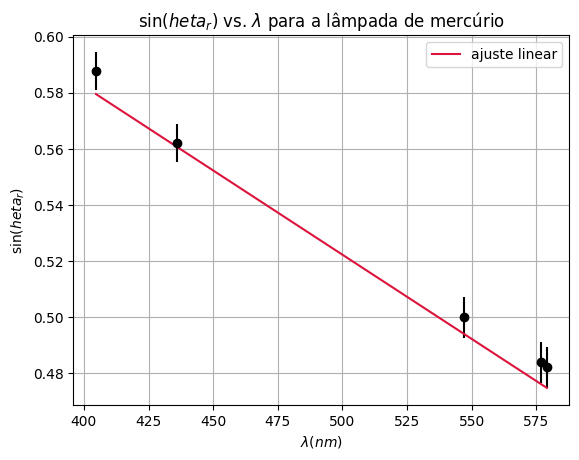

In [14]:
plt.errorbar(lambda_hg,sen_r_hg,yerr=inc_sen_hg,fmt='o',color='black',ecolor='black')

xs = np.linspace(lambda_hg[0],lambda_hg[-1],100)
plt.plot(xs,-0.0006*xs + 0.8223,label='ajuste linear',color='crimson')
plt.title('$\sin( \theta_r)$ vs. $\lambda$ para a lâmpada de mercúrio')
plt.legend()
plt.xlabel('$\lambda(nm)$')
plt.ylabel('$\sin( \theta_r)$')
plt.grid()

Sabemos que $d=\frac{-1}{\alpha}$ onde $\alpha$ é o coeficiente angular da reta, $\sigma d= -\frac{1}{\sigma \alpha}$.

E também que $\theta_i = \arcsin(\beta)$ onde $\beta$ é p coeficiente linear da reta.

In [20]:
d = 1/0.0006
inc_d = 1/(1.88*1e-5)

th_i = np.arcsin(0.8223)*180/np.pi
inc_th_i = np.arcsin(0.010)*180/np.pi
print(f'd: {d} +/- {inc_d}')
print(f'theta i: {th_i} +/- {inc_th_i}')

d: 1666.6666666666667 +/- 53191.48936170213
theta i: 55.315699772899116 +/- 0.5729673448571527


Ou seja, os valores obtidos para $d$ e para $\theta_i$ foram respectivamente de $1666.67 \pm 53191.49$ e $55.3 \pm 0.6$

### Hidrogênio

In [15]:
# regressão sem intercepto
modelo = sm.OLS(sen_r_h2,sm.add_constant(lambda_h2))
reg = modelo.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     62.92
Date:                Wed, 01 Nov 2023   Prob (F-statistic):             0.0155
Time:                        00:15:54   Log-Likelihood:                 14.312
No. Observations:                   4   AIC:                            -24.62
Df Residuals:                       2   BIC:                            -25.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0040      0.025     39.939      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


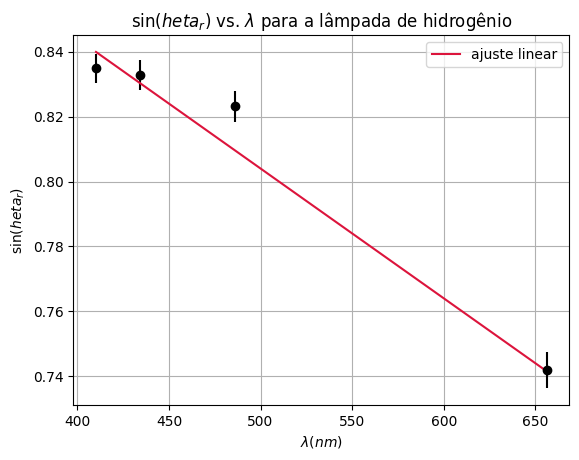

In [22]:
plt.errorbar(lambda_h2,sen_r_h2,yerr=inc_sen_h2,fmt='o',color='black',ecolor='black')

xs = np.linspace(lambda_h2[0],lambda_h2[-1],100)
plt.plot(xs,-0.0004*xs + 1.0040,label='ajuste linear',color='crimson')
plt.title('$\sin( \theta_r)$ vs. $\lambda$ para a lâmpada de hidrogênio')
plt.legend()
plt.xlabel('$\lambda(nm)$')
plt.ylabel('$\sin( \theta_r)$')
plt.grid()